In [ ]:
## this code is for a double well potential with a barrier maximum at zero and lowest minimum in negativ x-axis
## prae check:
## - if consider double well potential -> no print code can not be used
## - if barrier max is at zero -> no shift potential such that barrier max is at zero
## - if lowest minimum has negativ x-value -> no swap?
## **OR: include sign check of x-value of lowest minimum -> allow lower vs higer minimum decisi

## maybe check escape rates

In [1]:
from src.erscapeRates.esc_rates import *
## visualization
from src.visualizations import *
from src.erscapeRates.esc_util import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
## randomTraj sign_rand, len_rand
## Traj21 test trajectory -1 vs 1 -> 2:1 
########################
def create_test_trajectories(sign_rand, len_rand,randomTraj,Traj21):
    '''two simple trajectories
    
    Args:
    sign_rand= -1 or +1
    len_rand= 10**n
                            Return:
    for randomTraj=True    : random series between -2 and 2
    alternative Traj21=True: test trajectory -1 vs 1 -> 2:1 
    '''
    if randomTraj:
        trajectory = sign_rand*np.array([1,0.5,2,2,1.75,1,2,0.3,-0.1,-0.5,0.3,-1,-1,-2,-2,-1.5,-2,-0.7,-0.8,1,0.5,2,2,2,1.75,1,2,1.5,2,0.3,-0.1,
                 -0.5,0.3,-0.5,0.3,-1,-1,-0.7,-0.8 ,1,0.5,2,2,1.5,2,0.3,-0.1,-0.5,0.3,
                1,0.5,2,2,1.75,1,2,0.3,-0.1,-0.5,0.3,-1,-1,-0.7,-0.8,1,0.5,2,2,1.75,1,2,2,1.5,2,2,1.75,1,2,0.3,-0.1,
                 -0.5,0.3,-0.5,0.3,-1,-1,-2,-2,-1.5,-2,-0.7,-0.8 ,1,0.5,2,0.3,-0.1,-2,1.75,1,2,0.5,0.3,
                1,0.5,2,2,1.75,1,2,0.3,-0.1,-0.5,0.3,-1,-1,-0.7,-0.8,1,0.5,2,2,2,1.75,1,2,1.5,2,0.3,-0.1,
                 -0.5,0.3,-0.5,0.3,-1,-1,-2,-2,-1.5,-2,-0.7,-0.8 ,1,0.5,2,2,1.75,1,2,2,1.5,2,0.3,-0.1,-0.5,0.3,1,1,1,1,
                0.3,-1,-1,-2,-2,-1.5,-2,-0.7,-0.8 ,1,0.5,2,2,1.75,1.5,1,2,2,1.5,1,2,2,1.5,2,0.3,-0.1,-0.5,0.3,1,1,1,1,
                         2,2,1,2,2,2,2,2])
        trajectory=np.array(list(trajectory)*5*len_rand)
    if Traj21:
        eins=np.ones(500)
        trajectory1=np.array([eins*(-1),eins*(-1),eins*(-1),eins*(-1),eins*(-1),eins*(-1),eins*(-1),eins*(-1),eins*(-1),eins*(-1)]).reshape(-1,)
        trajectory2=np.array([eins,eins,eins,eins,eins]).reshape(-1,)
        trajectory=np.concatenate((trajectory1,trajectory2))
        trajectory=np.concatenate((trajectory,trajectory))
        trajectory=np.concatenate((trajectory,trajectory))
        trajectory=np.concatenate((trajectory,trajectory))
        trajectory=np.concatenate((trajectory,trajectory))
    
    return trajectory

In [3]:
## use test trajectory
## randomTraj sign_rand, len_rand
## Traj21 test trajectory -1 vs 1 -> 2:1 
########################
trajectory=create_test_trajectories(1, 1000,False,True)


In [4]:
## load trajectory
########################
#trajectory_from_integrator = np.load('Trajectory/trajs_GSD_DW_100_107_1-0001.npy', mmap_mode='r')
#trajectory=trajectory_from_integrator[0][:-1]

trajectory_from_integrator = np.load('Trajectory/trajs_EM_DW_100_107_1-0001.npy', mmap_mode='r')
trajectory=trajectory_from_integrator[3][:-1]

## for plotting 
#trajectory=trajectory_from_integrator[3][10000:1100000]  #[:-1]
labelsTimesteps = ['10', '200', '400', '600', '800', '1000'] ## chanege when changing intervall 
yTimesteps = [0,200000,400000,600000,800000,1000000]

## GSD 
labelsTimesteps = ['1', '20', '40', '60', '80', '100'] ## chanege when changing intervall 
yTimesteps = [0,20000,40000,60000,80000,100000]

In [5]:
trajectory.size

10000000

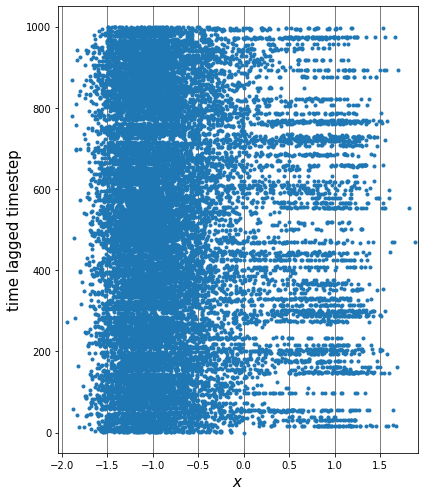

In [6]:
## Plot trajectory for the test trajectory 
########################
plotTraj(trajectory, delta=100)


In [7]:
## determine escape rates
########################
timestep=0.0001
esc_rates_DW(trajectory,timestep)


Your trajectory is 10000000 steps long.
For computational purpos we reshape the trajectory in (10000, 1000) sub-trajectories.
The negative minimum is the longer populated minimum.
More transitions to the minimum at the negative x-direction are counted.
The first minimum populated is in positive x-direction.
The trajectory does noch start in the longer populated minimum.
The escape rate for transitions from longer to shorter populated minimum:  0.10810758153717338
The escape rate for transitions from shorter to longer populated minimum:  0.6562428669253595


(0.10810758153717338, 0.6562428669253595)

In [8]:
## Plot trajectory for the test trajectory 
########################
trajectory=trajectory #[::100]
traj_pos_esc, traj_prae_pos_esc, traj_neg_esc, traj_prae_neg_esc, lpm_neg = esc_condition_DW(trajectory)

if trajectory.size > 999:
        print('Your trajectory is '+str(trajectory.size)+' steps long.')
        L    = 1000   ## can we improve?
        traj = trajectory.reshape((-1,L))
        print('For computational purpos we reshape the trajectory in '+str(traj.shape)+' sub-trajectories.')
        List_esc_conditions, lpm_neg               = list_esc_conditions(traj)
        Traj_prae_esc_to_neg, Traj_prae_esc_to_pos = traj_prae_esc_List(List_esc_conditions,traj,L)
        if lpm_neg:
            print('The negative minimum is the longer populated minimum.')
        else:
            print('The positive minimum is the longer populated minimum.')
else:
        print('Your trajectory is '+str(trajectory.size)+' steps long.')
        traj_pos_esc, traj_prae_pos_esc, traj_neg_esc, traj_prae_neg_esc, lpm_neg = esc_condition_DW(trajectory, esc_limit=0.8)
        Traj_prae_esc_to_neg, Traj_prae_esc_to_pos = traj_prae_esc_(traj_pos_esc, traj_prae_pos_esc, traj_neg_esc, traj_prae_neg_esc)
        if lpm_neg:
            print('The negative minimum is the longer populated minimum.')
        else:
            print('The positive minimum is the longer populated minimum.')

## find in which direction more jumps take place
if Traj_prae_esc_to_neg.size > Traj_prae_esc_to_pos.size:
        print('More transitions to the minimum at the negative x-direction are counted.')
        jump_to_neg, jump_to_pos = find_jumps(Traj_prae_esc_to_neg,Traj_prae_esc_to_pos)
    
else:
        print('More transitions to the minimum at the positive x-direction are counted.')
        jump_to_pos, jump_to_neg = find_jumps(Traj_prae_esc_to_pos,Traj_prae_esc_to_neg)
            
            

Your trajectory is 10000000 steps long.
For computational purpos we reshape the trajectory in (10000, 1000) sub-trajectories.
The negative minimum is the longer populated minimum.
More transitions to the minimum at the negative x-direction are counted.


/home/schaefej51/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/schaefej51/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


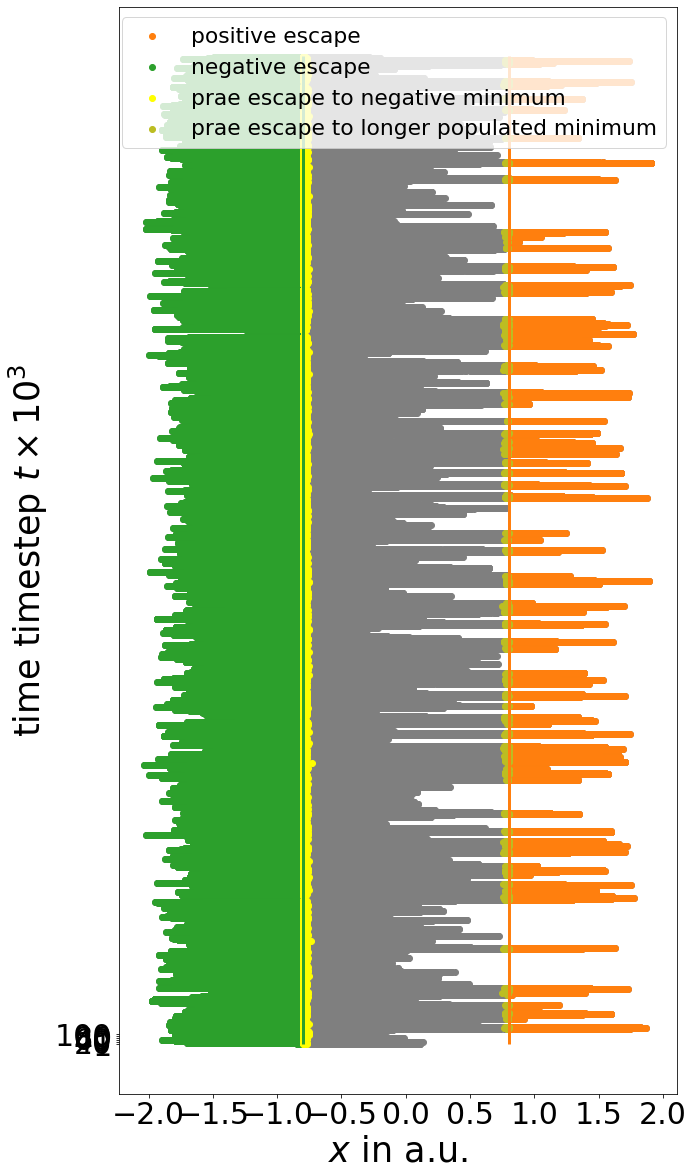

In [9]:
x_line      = np.linspace(-2, 2, 1000)

plt.figure(figsize=(10,20))

plt.scatter(trajectory,range(len(trajectory)), color='C7')

plt.scatter(trajectory[traj_pos_esc],traj_pos_esc, color='C1',label='positive escape')
plt.scatter(trajectory[traj_neg_esc],traj_neg_esc, color='C2',label='negative escape ')

plt.scatter(trajectory[Traj_prae_esc_to_neg],Traj_prae_esc_to_neg, color='yellow',label='prae escape to negative minimum')
plt.scatter(trajectory[Traj_prae_esc_to_pos],Traj_prae_esc_to_pos, color='C8',label='prae escape to longer populated minimum')

plt.vlines(-0.8,-5000,len(trajectory)+10000,lw=3, color='C2')
plt.vlines(0.8,-5000,len(trajectory)+10000,lw=3, color='C1')

plt.yticks(yTimesteps,labelsTimesteps,fontsize=30) ## CHANAGE WHEN CHANGING INTERVAL
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.ylabel(r'time timestep $t\times 10^3$', fontsize=35)
plt.xlabel(r'$x$ in a.u.', fontsize=35)
plt.legend(fontsize=21.75) #bbox_to_anchor = (1.05, 0.6))


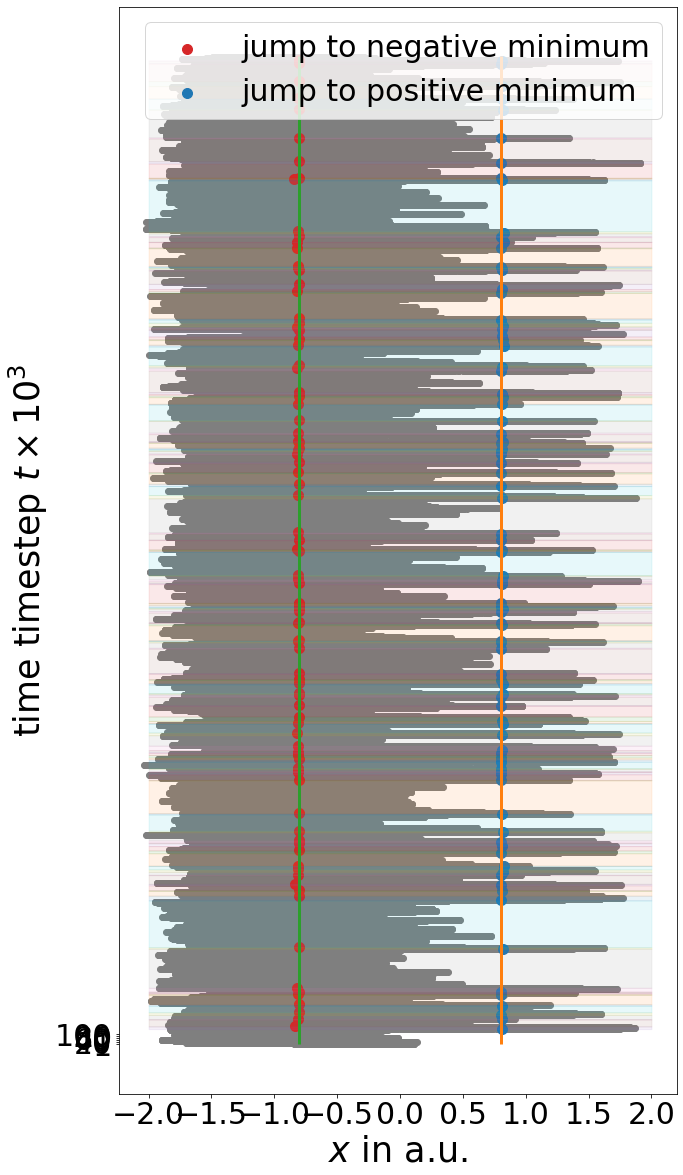

In [10]:
x_line      = np.linspace(-2, 2, 1000)

plt.figure(figsize=(10,20))

plt.scatter(trajectory,range(len(trajectory)), color='C7')


plt.scatter(trajectory[jump_to_neg],jump_to_neg, s=100 ,color='C3',label='jump to negative minimum')
plt.scatter(trajectory[jump_to_pos],jump_to_pos, s=100 ,color='C0',label='jump to positive minimum')

plt.vlines(-0.8,-5000,len(trajectory)+10000,lw=3, color='C2')
plt.vlines(0.8,-5000,len(trajectory)+10000,lw=3, color='C1')

jumps = np.sort(np.concatenate((jump_to_neg,jump_to_pos)))
x=x_line
for j in range(1,jumps.size):
    plt.fill_between(x_line, jumps[j-1], jumps[j], color='C'+str(j+3),alpha=.1) #,label='escape phase '+str(j))

plt.yticks(yTimesteps,labelsTimesteps,fontsize=30) ## CHANAGE WHEN CHANGING INTERVAL
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.ylabel(r'time timestep $t\times 10^3$', fontsize=35)
plt.xlabel(r'$x$ in a.u.', fontsize=35)
plt.legend(fontsize=30) #bbox_to_anchor = (1.05, 0.6))

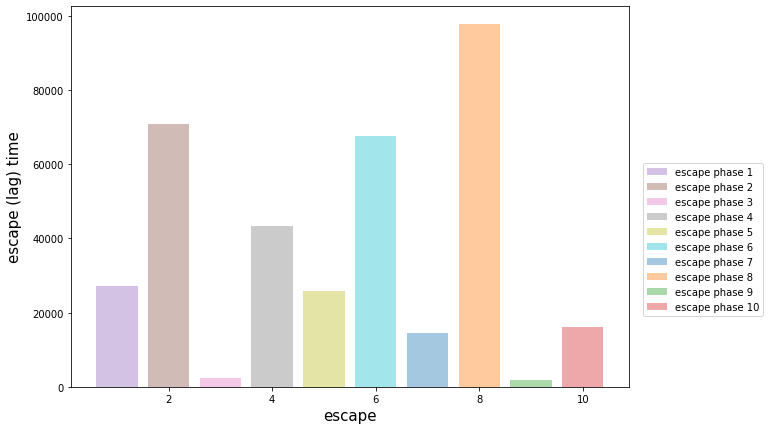

In [11]:
plt.figure(figsize=(10,7))
duration=jumps[1:]-jumps[:-1]
for j in range(10): #len((duration))):
    plt.bar(j+1, duration[j], color='C'+str(j+4),alpha=.4,label='escape phase '+str(j+1))
plt.ylabel(r'escape (lag) time', fontsize=15)
plt.xlabel(r'escape', fontsize=15)
plt.legend(bbox_to_anchor = (1.25, 0.6))   

In [ ]:
## maybee usefull 
plt.figure(figsize=(10,7))
duration=[esc_times_lpm_to_spm,esc_times_spm_to_lpm]  # is encapsulated in the function 
name=['lpm->spm','spm->lpm']
for j in range(len((duration))):
    for i,dur in enumerate(duration[j]):
        plt.bar((j+1)*(i+10), dur, color='C'+str(j),alpha=.1,label='escape phase '+str(j+1))
plt.ylabel(r'escape (lag) time', fontsize=15)
plt.xlabel(r'escape', fontsize=15)
plt.legend(bbox_to_anchor = (1.25, 0.6))   